In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
train_data = pd.read_csv("aug_train.csv", delimiter = ",")
test_data = pd.read_csv("aug_test.csv", delimiter = ",")

#Maybe if I'm feeling adventurous I could combine test and train to create one big dataset. Then split it again to create a new test/train set

In [ ]:
test_data

In [4]:
train_data["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

Important to note: 32% of the company type responses are missing values. Why might this be? Maybe some people don't know what kind of company they work for (which is crazy), maybe others have NDAs so they can't specify. Regardless that's too much data to ignore so dummy_na is True for get_dummies.

Additionally, 31% of the responses for company size are missing, likely for similar reasons as company type.

24% of respondents didn't select anything for the gender question, pretty sure they know their own gender though. 

In [ ]:
#show correlations of relevant info first


I want to create a correlation matrix to determine how the variables are related. I'm working to create a classification model that can accurately predict if people are looking for a job change or not. I should look at each factor and determine how they are correlated to each other. Maybe also see if they are correlated to the target at all

In [ ]:
#train_no_city = train_data.drop("city", axis = 1)

In [49]:
#City code is removed currently because it more than doubles the amount of columns in the dataset after get_dummies is called

train_dummies = pd.get_dummies(train_data, dummy_na= True)

labels = train_dummies["target"]
train_dummies.drop(["target","relevent_experience_nan","enrollee_id"], axis = 1,inplace = True)

In [50]:
train_dummies

,city_development_index,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_Public Sector,company_type_Pvt Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,last_new_job_nan
0,0.920,36,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False
1,0.776,47,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,0.624,83,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.789,52,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0.767,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
19154,0.920,52,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
19155,0.920,44,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
19156,0.802,97,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
#remove irrelevant columns
#train_dummies.drop("relevent_experience_nan", axis = 1, inplace=True)

In [8]:
train_dummies.dtypes

enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
gender_Female                bool
                           ...   
last_new_job_3               bool
last_new_job_4               bool
last_new_job_>4              bool
last_new_job_never           bool
last_new_job_nan             bool
Length: 74, dtype: object

In [51]:
x_train, x_test, y_train, y_test = train_test_split(train_dummies, labels, test_size = 0.2, random_state = 21)

In [52]:
rf_model = RandomForestClassifier(bootstrap=True)

In [ ]:
#X =  train_dummies.astype(np.float32, copy=False)

In [53]:
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_train)

In [54]:
feature_importances = rf_model.feature_importances_

In [ ]:
train_dummies

In [ ]:
test_data

In [58]:
Feature_Importances = pd.DataFrame({
    'Feature': train_dummies.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top20 = Feature_Importances.iloc[:20, ]

In [ ]:
top20

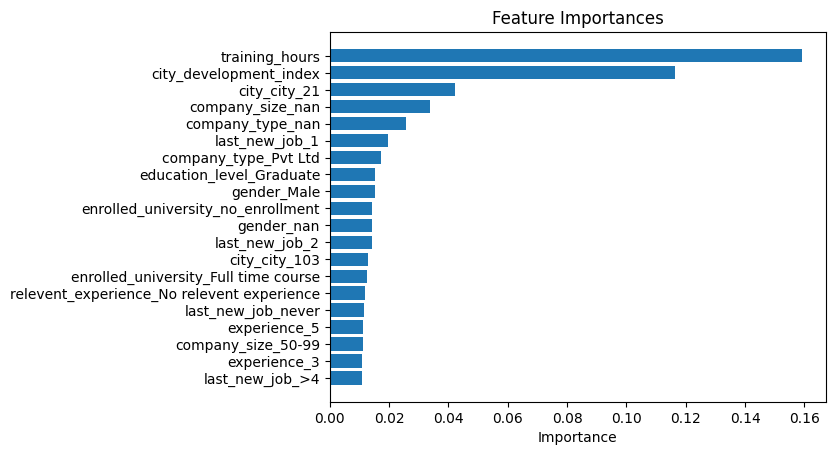

In [59]:
plt.barh(top20["Feature"], top20["Importance"])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [60]:
#Move this to a separate file and import it
def print_prediction(training, prediction):
    #Create the figure and axis
    f, ax = plt.subplots(1, 1, figsize=(6, 6))

    #Scatter plot of true vs predicted values
    ax.scatter(training, prediction, color="maroon", s=2, label="Predictions")

    #Get limits for the diagonal reference line
    min_val = min(np.min(training), np.min(prediction))
    max_val = max(np.max(training), np.max(prediction))

    #Plot the black dashed diagonal line
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, label="Ideal Fit")

    #Set labels
    ax.set_xlabel("Religion Predicting Wellbeing-Target")
    ax.set_ylabel("Model Prediction")

    #Remove top and right spines
    sns.despine(ax=ax)

    #Add legend
    ax.legend()

    #Show plot
    plt.show()


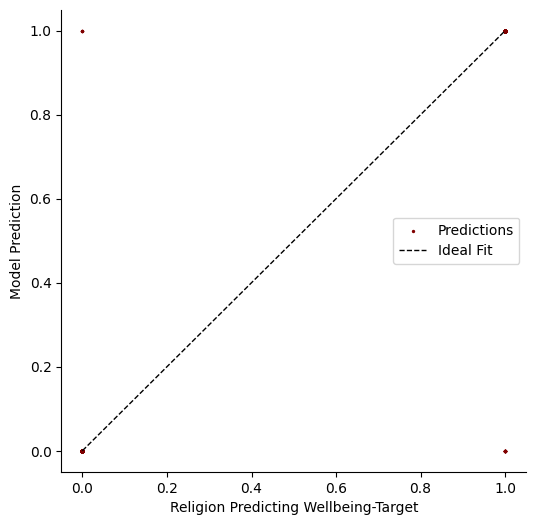

In [ ]:
train_dummies